In [61]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm as sp
%config InlineBackend.figure_format = 'svg'

off  = 5
BINS = 17

path = 'C:/Users/Mattia Mencagli/Documents/DATA/Latenze/'
pathfigs = path+'figs/'
names = ['Refactory_09-07-2025', 'Original_10-07-2025']
names_A  = [names[i]+'_latency_algo'   for i in range(len(names))]
names_NA = [names[i]+'_latency_noalgo' for i in range(len(names))]

def Rsquare(y_data, y_fit):
    ss_res = np.sum((y_data - y_fit)**2)
    ss_tot = np.sum((y_data - np.mean(y_data))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

def read_lat(path, names, B, O):
    C = len(names)
    LAT = []
    HCOUNTS  = np.zeros((C,B))
    HEDGES   = np.zeros((C,B+1))
    HCENTERS = np.zeros((C,B)) 
    PAR = np.zeros((C,2)); 
    RSQ = np.zeros((C))
    for i,name in enumerate(names):
        LAT.append(np.genfromtxt(path+name+'.csv', delimiter=';')[O:,0])
        HCOUNTS[i,:], HEDGES[i,:] = np.histogram(LAT[i], bins=B, density=True)
        HCENTERS[i,:] = 0.5 * (HEDGES[i,:-1] + HEDGES[i,1:])
        PAR[i,:] = sp.fit(LAT[i])
        RSQ[i] = Rsquare(HCOUNTS[i,:], sp.pdf(HCENTERS[i,:], *PAR[i,:]))
        # Sparams_algo = scipy.stats.skewnorm.fit(latency_algo)
        # Rs_S_algo = Rsquare(hist_algo_counts, scipy.stats.skewnorm.pdf(hist_algo_centers, *Sparams_algo), "SkGauss algo")
    return LAT, HCOUNTS, HEDGES, HCENTERS, PAR, RSQ

latency_A,  hist_counts_A,  hist_edges_A,  hist_centers_A,  params_A,  Rsq_A  = read_lat(path, names_A,  BINS, off)
latency_NA, hist_counts_NA, hist_edges_NA, hist_centers_NA, params_NA, Rsq_NA = read_lat(path, names_NA, BINS, off)

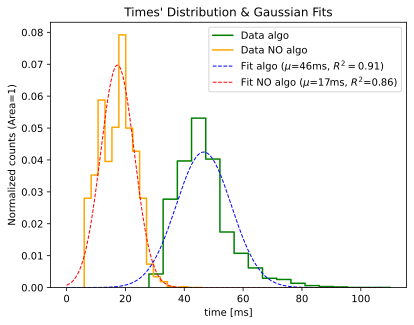

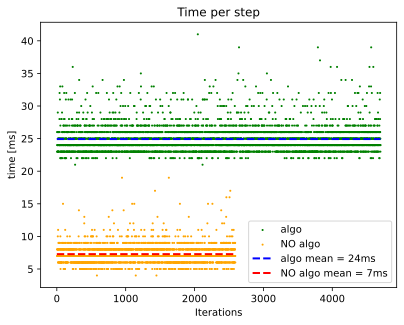

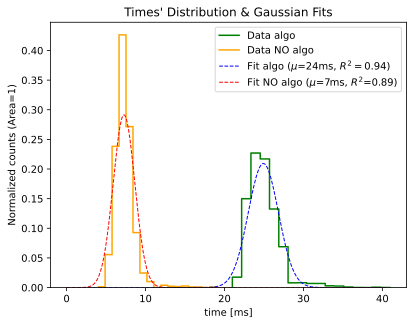

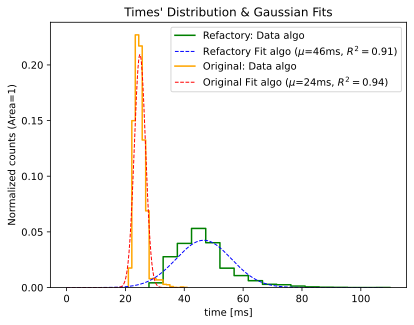

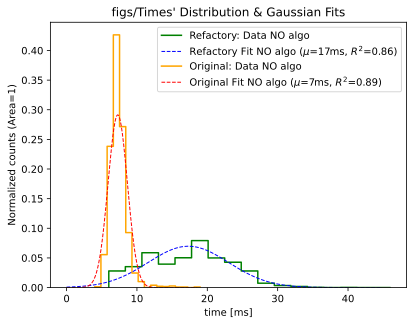

In [62]:
    # _ = plt.plot(X, scipy.stats.skewnorm.pdf(X, *Sparams_algo), label=r'SkGauss algo $R^2=%.2f$'%Rs_S_algo, color='darkblue', linestyle='-.', linewidth=1.5)
lw = 1.5
col = ['green', 'orange', 'blue', 'red']

def plot_lat(i):
    L_latA  = len(latency_A[i])
    L_latNA = len(latency_NA[i])
    _ = plt.figure(i)
    _ = plt.scatter(np.linspace(off, L_latA,  L_latA),   latency_A[i], color=col[0],  s=1, marker='X', label='algo')
    _ = plt.scatter(np.linspace(off, L_latNA, L_latNA), latency_NA[i], color=col[1], s=1, marker='X', label='NO algo')
    _ = plt.hlines(np.mean(latency_A[i]),  0, L_latA,  color=col[2], linestyle='--', linewidth=2, label='algo mean = %dms'%np.mean(latency_A[i]))
    _ = plt.hlines(np.mean(latency_NA[i]), 0, L_latNA, color=col[3],  linestyle='--', linewidth=2, label='NO algo mean = %dms'%np.mean(latency_NA[i]))
    _ = plt.legend()
    _ = plt.ylabel('time [ms]')
    _ = plt.xlabel('Iterations')
    _ = plt.title('Time per step')
    _ = plt.savefig(pathfigs+names_A[i]+'_TimePerStep.png', bbox_inches='tight', dpi=300, format='png')
    
    _ = plt.figure(i+10)
    _ = plt.stairs(hist_counts_A[i,:], hist_edges_A[i,:], color=col[0], linewidth=lw, label='Data algo')
    _ = plt.stairs(hist_counts_NA[i,:], hist_edges_NA[i,:], color=col[1], linewidth=lw, label='Data NO algo')
    X = np.linspace(0,max(hist_centers_A[i,:]),500)
    _ = plt.plot(X, sp.pdf(X, *params_A[i,:]), color=col[2], linestyle='--', linewidth=lw-0.5, 
                 label=r'Fit algo ($\mu$=%dms, $R^2=%.2f$)'%(params_A[i,0],Rsq_A[i]))
    _ = plt.plot(X, sp.pdf(X, *params_NA[i,:]), color=col[3], linestyle='--', linewidth=lw-0.5, 
                 label=r'Fit NO algo ($\mu$=%dms, $R^2$=%.2f)'%(params_NA[i,0],Rsq_NA[i]))
    _ = plt.legend()
    _ = plt.ylabel('Normalized counts (Area=1)')
    _ = plt.xlabel('time [ms]')
    _ = plt.title('Times\' Distribution & Gaussian Fits')
    _ = plt.savefig(pathfigs+names_NA[i]+'_TimesDistribution.png', bbox_inches='tight', dpi=300, format='png')

def conparison_distr():
    _ = plt.figure(100)
    for i,name in enumerate(names):
        X = np.linspace(0,max(hist_centers_A[i,:]),500)
        nam = name.split('_')[0]
        _ = plt.stairs(hist_counts_A[i,:], hist_edges_A[i,:], color=col[i], linewidth=lw, label='%s: Data algo'%nam)
        _ = plt.plot(X, sp.pdf(X, *params_A[i,:]), color=col[i+2], linestyle='--', linewidth=lw-0.5, 
                     label=r'%s: Fit algo ($\mu$=%dms, $R^2=%.2f$)'%(nam,params_A[i,0],Rsq_A[i]))
    # _ = plt.plot(X, scipy.stats.skewnorm.pdf(X, *Sparams_noalgo), label='SkGauss NO algo $R^2=%.2f$'%Rs_S_noalgo, color='darkred', linestyle='-.', linewidth=1.5)
    _ = plt.legend()
    _ = plt.ylabel('Normalized counts (Area=1)')
    _ = plt.xlabel('time [ms]')
    _ = plt.title('Times\' Distribution & Gaussian Fits')
    _ = plt.savefig(pathfigs+'CompTimesDistr_Algo.png', bbox_inches='tight', dpi=300, format='png')
    
    _ = plt.figure(101)
    for i,name in enumerate(names):
        X = np.linspace(0,max(hist_centers_NA[i,:]),500)
        nam = name.split('_')[0]
        _ = plt.stairs(hist_counts_NA[i,:], hist_edges_NA[i,:], color=col[i], linewidth=lw, label='%s: Data NO algo'%nam)
        _ = plt.plot(X, sp.pdf(X, *params_NA[i,:]), color=col[i+2], linestyle='--', linewidth=lw-0.5, 
                     label=r'%s: Fit NO algo ($\mu$=%dms, $R^2$=%.2f)'%(nam,params_NA[i,0],Rsq_NA[i]))
    # _ = plt.plot(X, scipy.stats.skewnorm.pdf(X, *Sparams_noalgo), label='SkGauss NO algo $R^2=%.2f$'%Rs_S_noalgo, color='darkred', linestyle='-.', linewidth=1.5)
    _ = plt.legend()
    _ = plt.ylabel('Normalized counts (Area=1)')
    _ = plt.xlabel('time [ms]')
    _ = plt.title('figs/Times\' Distribution & Gaussian Fits')
    _ = plt.savefig(pathfigs+'CompTimesDistr_NoAlgo.png', bbox_inches='tight', dpi=300, format='png')

plot_lat(0)
plot_lat(1)
conparison_distr()